In [1]:
import requests, json
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime

### BITCOIN KZENGINE SIGNAL ANALYSIS

In [2]:
payload = {"ticker":"btc"}
url = "https://1dd4-161-97-89-37.ngrok-free.app/signals_ticker"
result = requests.post(url=url, json=payload)

In [3]:
data = json.loads(result.text)
df = pd.DataFrame(data)
df.datetime_t = pd.to_datetime(df.datetime_t)
df.set_index(df.datetime_t, drop=True, inplace=True)
df.index = df.index - datetime.timedelta(hours=3)
df = df.drop(axis=1, columns=['datetime_t'])
df.sort_index(inplace=True)
df_hourly = df[df.apply(lambda row: row.forecast_model['interval'] != '1d', axis=1)]
df_hourly.tail()

,backtest_returns_data,forecast_model,japanese_candle,signal,ticker,tweet_counts
datetime_t,,,,,,
2023-10-11 11:00:00+00:00,"{st_ema_6,st_adxdmi_5,st_mfi_10_pct,st_mfi_8_p...","{'accuracy_score': 0.5464247598719317, 'ai_typ...",CDLDOJI_Bull,0,btc,0
2023-10-11 12:00:00+00:00,"{st_ema_6,st_adxdmi_5,st_mfi_10_pct,st_mfi_8_p...","{'accuracy_score': 0.5421558164354322, 'ai_typ...",CDLLONGLEGGEDDOJI_Bull,0,btc,0
2023-10-11 13:00:00+00:00,"{st_ema_6,st_adxdmi_5,st_mfi_10_pct,st_mfi_8_p...","{'accuracy_score': 0.5437100213219617, 'ai_typ...",CDLMATCHINGLOW_Bull,0,btc,0
2023-10-11 14:00:00+00:00,"{st_ema_6,st_adxdmi_5,st_mfi_10_pct,st_mfi_8_p...","{'accuracy_score': 0.5447761194029851, 'ai_typ...",CDLSHORTLINE_Bear,1,btc,0
2023-10-16 10:00:00+00:00,"{st_ema_6,st_mfi_10_pct,st_mfi_8_pct,st_adxdmi...","{'accuracy_score': 0.5229455709711847, 'ai_typ...",CDLSHORTLINE_Bear,0,btc,0


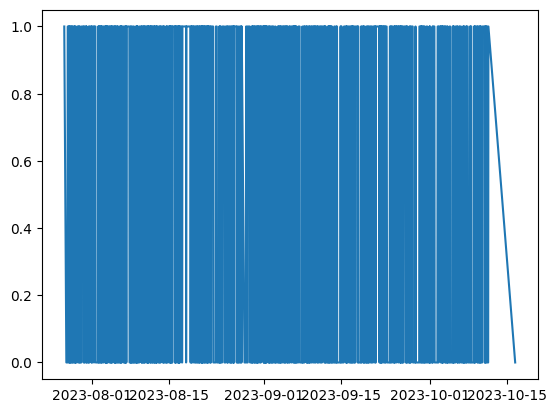

In [4]:
plt.plot(df.index, df['signal'])

In [5]:
df_hourly.forecast_model.iloc[0]['interval']

'1h'

[*********************100%***********************]  1 of 1 completed


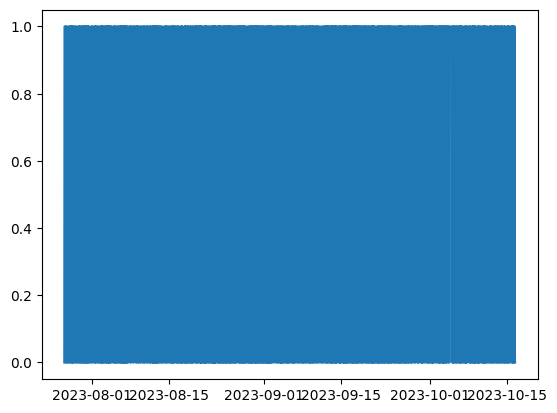

In [6]:
btc_yf = yf.download('BTC-USD', start="2023-07-27", interval='1h')
btc_yf['act_signal'] = np.where(btc_yf['Close'].pct_change() > 0, 1, 0)
btc_yf['pct'] = btc_yf.Close.pct_change()
plt.plot(btc_yf.index, btc_yf["act_signal"])

In [7]:
btc_yf.info(), df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1955 entries, 2023-07-27 00:00:00+00:00 to 2023-10-16 10:00:00+00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1955 non-null   float64
 1   High        1955 non-null   float64
 2   Low         1955 non-null   float64
 3   Close       1955 non-null   float64
 4   Adj Close   1955 non-null   float64
 5   Volume      1955 non-null   int64  
 6   act_signal  1955 non-null   int64  
 7   pct         1954 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 137.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1749 entries, 2023-07-27 09:00:00+00:00 to 2023-10-16 10:00:00+00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   backtest_returns_data  1749 non-null   object
 1   forecast_model         1749 non-null   object
 2   japanese_candle      

(None, None)

In [8]:
btc_yf.loc[df_hourly.index, 'signal'] = df_hourly['signal']
btc_yf = btc_yf.dropna()

In [9]:
btc_yf

,Open,High,Low,Close,Adj Close,Volume,act_signal,pct,signal
Datetime,,,,,,,,,
2023-07-27 09:00:00+00:00,29459.216797,29560.966797,29459.216797,29551.265625,29551.265625,81599488,1,0.003152,0.0
2023-07-27 10:00:00+00:00,29546.113281,29552.125000,29480.312500,29482.810547,29482.810547,102379520,0,-0.002316,0.0
2023-07-27 11:00:00+00:00,29490.933594,29520.707031,29478.330078,29505.267578,29505.267578,0,1,0.000762,0.0
2023-07-27 12:00:00+00:00,29508.166016,29508.166016,29464.062500,29489.669922,29489.669922,26038272,0,-0.000529,0.0
2023-07-27 13:00:00+00:00,29492.818359,29501.738281,29443.453125,29446.339844,29446.339844,0,0,-0.001469,0.0
...,...,...,...,...,...,...,...,...,...
2023-10-11 11:00:00+00:00,27281.558594,27297.455078,27187.955078,27200.904297,27200.904297,0,0,-0.002973,0.0
2023-10-11 12:00:00+00:00,27196.958984,27258.455078,27062.796875,27171.683594,27171.683594,97126400,0,-0.001074,0.0
2023-10-11 13:00:00+00:00,27172.865234,27185.613281,27086.476562,27143.173828,27143.173828,0,0,-0.001049,0.0


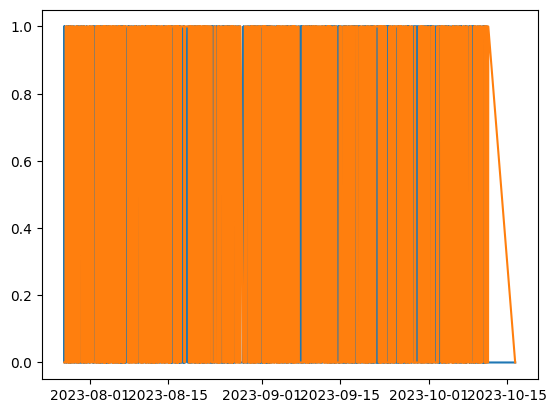

In [10]:
plt.plot(btc_yf.index, btc_yf["act_signal"])
plt.plot(btc_yf.index, btc_yf["signal"])
total_success_prediction = (btc_yf["act_signal"] == btc_yf["signal"]).sum()

In [11]:
success_rate = total_success_prediction / btc_yf.shape[0]
success_rate

0.5157773952954676